# LSTM - word2vec sequence

- **Training set**: LO_SARD102 (95%) (0.75 split)
- **Test/Validation set:** LO_SARD102 (95%) (0.25 split)
- **Features**: word2vec sequence (100)
- **Class imbalance processing**: Undersampling

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_undersample_X_full_train.npy', mmap_mode='r')
Y_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_undersample_Y_full_train.npy', mmap_mode='r')
print(X_train.shape)
print(Y_train.shape)

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_full_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_full_val.npy', mmap_mode='r')
print(X_val.shape)
print(Y_val.shape)

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/JTT_w2vseq_X.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/JTT_w2vseq_Y.npy',  mmap_mode='r')
print(X_test.shape)
print(Y_test.shape)

/home/scheuererra68323/venv37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


(10276, 100, 100)
(10276,)
(33215, 100, 100)
(33215,)
(21851, 100, 100)
(21851,)


In [2]:
train_gen = DataGenerator(_X=X_train, _y=Y_train, batch_size=2048)
val_gen =   DataGenerator(_X=X_val,   _y=Y_val,   batch_size=2048)
test_gen =  DataGenerator(_X=X_test,  _y=Y_test,  batch_size=2048)

## Build & train keras model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 42,305
Trainable params: 42,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
6/6 [==============================] - 12s 2s/step - loss: 0.6916 - accuracy: 0.5242 - val_loss: 0.6925 - val_accuracy: 0.8859
Epoch 2/6
6/6 [==============================] - 12s 2s/step - loss: 0.6858 - accuracy: 0.5300 - val_loss: 0.6716 - val_accuracy: 0.9321
Epoch 3/6
6/6 [==============================] - 12s 2s/step - loss: 0.6759 - accuracy: 0.5609 - val_loss:

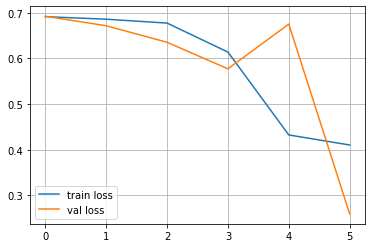

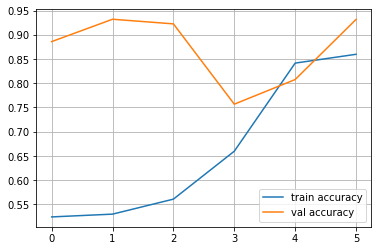

In [7]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(100, 100), 
                      return_sequences=False))
model.add(layers.Dropout(0.1))
#model.add( layers.TimeDistributed(layers.Dense(16)) )
#model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
             )
history = model.fit_generator(train_gen,
                    epochs=6,
                    verbose=True,
                    validation_data=val_gen
                   )

plot_loss(history)
plot_accuracy(history)

## Evaluation

In [8]:
Y_pred = numpy.round(model.predict_generator(test_gen))

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate_generator(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     21243
         1.0       0.04      0.06      0.05       608

    accuracy                           0.93     21851
   macro avg       0.51      0.51      0.51     21851
weighted avg       0.95      0.93      0.94     21851

Confusion matrix:
[[20346   897]
 [  571    37]]

Confusion matrix (Percentages):
[[93.112  4.105]
 [ 2.613  0.169]]

Metrics:
Sensitivity (TPR): 0.060855
Specifity (TNR):   0.957774

FPR: 0.042226
FNR: 0.939145

Balanced accuracy: 0.509315

Test loss:	0.248770
Test accuracy:	0.932818


In [9]:
model.save('testJTT_LSTM_word2vec_undersample.h5')

In [14]:
# model.load_weights('testJTT_LSTM_word2vec_undersample.h5')